In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline 
from sklearn.preprocessing import StandardScaler 
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score # Accuracy metrics 
from sklearn.metrics import precision_score # Precision metrics
from sklearn.metrics import recall_score # Recall metrics
from sklearn.metrics import f1_score # F1 metrics
from sklearn.metrics import confusion_matrix # Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay # Confusion matrix display
from sklearn.metrics import mean_absolute_error # Mean absolute error
from sklearn.metrics import mean_squared_error # Mean squared error

In [2]:
# Reading File CSV
df = pd.read_csv('output.csv')

In [3]:
# Splitting Data into Class and Value
X = df.drop('class', axis=1) # Class
y = df['class'] # Value

In [4]:
# Splitting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=1234) #1234

In [5]:
# Max Depth Value
size = [None, 2, 4, 8, 16]

rfNone
1.0
1.0
1.0
1.0
0.0
0.0
0.0
rf2
0.8899896325308144
0.8988178484369197
0.8945388286473528
0.8931275944716348
0.11139269669392927
0.11415735514341666
0.33787180282381757
rf4
0.9275429098030181
0.9347932015044272
0.9306277122470347
0.9299813966151929
0.07280267250316784
0.07349383711553968
0.2710974679253565
rf8
0.9979265061628845
0.9979994726063302
0.9980169160489668
0.9980045920263311
0.0020734938371155397
0.0020734938371155397
0.045535632609150604
rf16
0.999654417693814
0.9996665752366121
0.9996683062593893
0.9996674223214205
0.0003455823061859233
0.0003455823061859233
0.018589844167876266


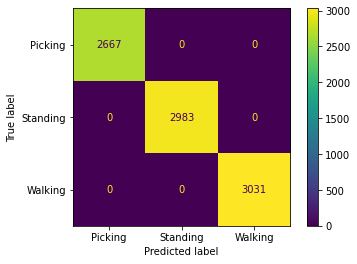

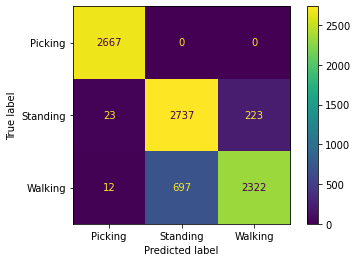

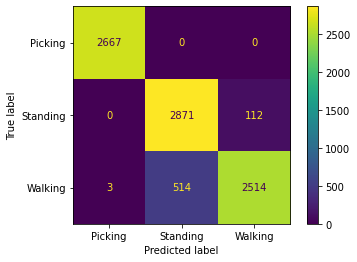

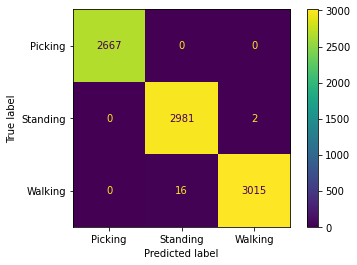

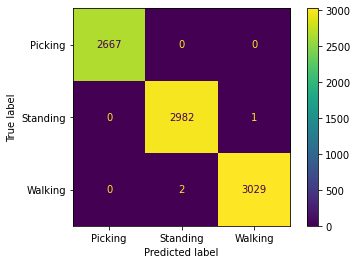

In [6]:
for i in size:

    # Pipeline for Max Depth
    pipelines = {
    'rf' + str(i) :make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100, max_depth=i, random_state=42))}

    # Training Pipeline
    fit_models = {}
    for algo, pipeline in pipelines.items():
        model = pipeline.fit(X_train, y_train)
        fit_models[algo] = model
        for algo, model in fit_models.items():
            yhat = model.predict(X_test)

            # Change Class to New Value Picking [0], Standing [1], Walking [2]
            ytest = pd.factorize(y_test)[0]
            ypred = pd.factorize(yhat)[0]

            print(algo)

            # Confusion Matrix Display
            cm = confusion_matrix(y_test, yhat, labels=model.classes_)
            disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)

            # Accuracy
            print(accuracy_score(y_test, yhat))
            
            # Precision
            print(precision_score(y_test, yhat, average='macro'))

            # Recall
            print(recall_score(y_test, yhat, average='macro'))

            # F1 Score
            print(f1_score(y_test, yhat, average='macro'))

            # Mean Absolute Error
            print(mean_absolute_error(ytest, ypred))

            # Mean Squared Error
            print(mean_squared_error(ytest, ypred))

            # Root Mean Squared Error
            print(np.sqrt(mean_squared_error(ytest, ypred)))

            disp.plot()